# **Household Electric Power Consumption**

**Imported Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


**Loading Dataset**

In [6]:
df = pd.read_csv("/content/household_power_consumption.txt",delimiter=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Check duplicate rows
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360666 entries, 0 to 360665
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   360666 non-null  object 
 1   Time                   360666 non-null  object 
 2   Global_active_power    360666 non-null  object 
 3   Global_reactive_power  360666 non-null  object 
 4   Voltage                360666 non-null  object 
 5   Global_intensity       360666 non-null  object 
 6   Sub_metering_1         360666 non-null  object 
 7   Sub_metering_2         360666 non-null  object 
 8   Sub_metering_3         356738 non-null  float64
dtypes: float64(1), object(8)
memory usage: 24.8+ MB


np.int64(0)

**Converting Date & Time → Datetime**

In [9]:
df['datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)

df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [10]:
for col in df.columns:
    if col != 'datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360666 entries, 0 to 360665
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Global_active_power    356739 non-null  float64       
 1   Global_reactive_power  356739 non-null  float64       
 2   Voltage                356739 non-null  float64       
 3   Global_intensity       356739 non-null  float64       
 4   Sub_metering_1         356739 non-null  float64       
 5   Sub_metering_2         356739 non-null  float64       
 6   Sub_metering_3         356738 non-null  float64       
 7   datetime               360666 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.0 MB


**Handle Missing Values**

In [11]:
# Percentage of missing values
(df.isnull().mean() * 100)

# Forward fill (time-series safe)
df.fillna(method='ffill', inplace=True)

df.isnull().sum()


/tmp/ipython-input-2196718447.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
datetime,0


In [12]:
df.set_index('datetime', inplace=True)

# Hourly average
df_hourly = df.resample('H').mean()

# Daily average
df_daily = df.resample('D').mean()

df_hourly.head()


/tmp/ipython-input-3171006824.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


**Overall Power Consumption Trend**

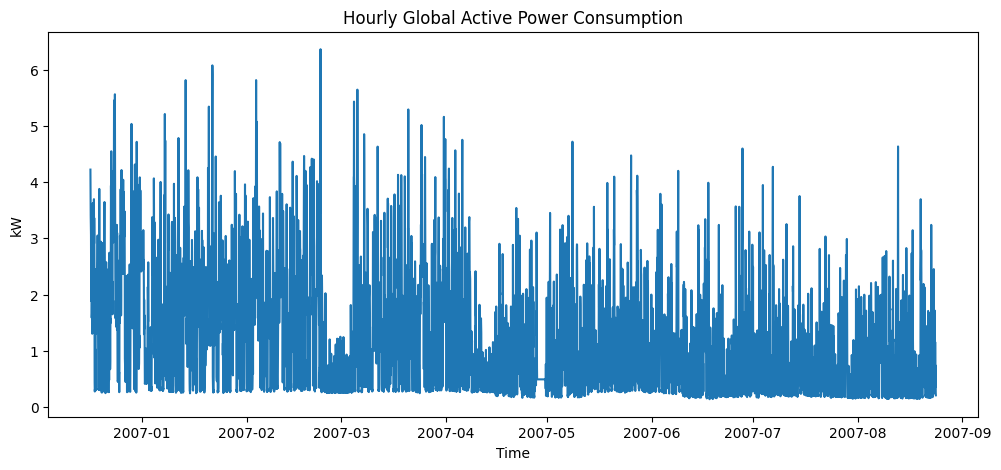

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df_hourly['Global_active_power'])
plt.title("Hourly Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("kW")
plt.show()


**Sub-metering Comparison**

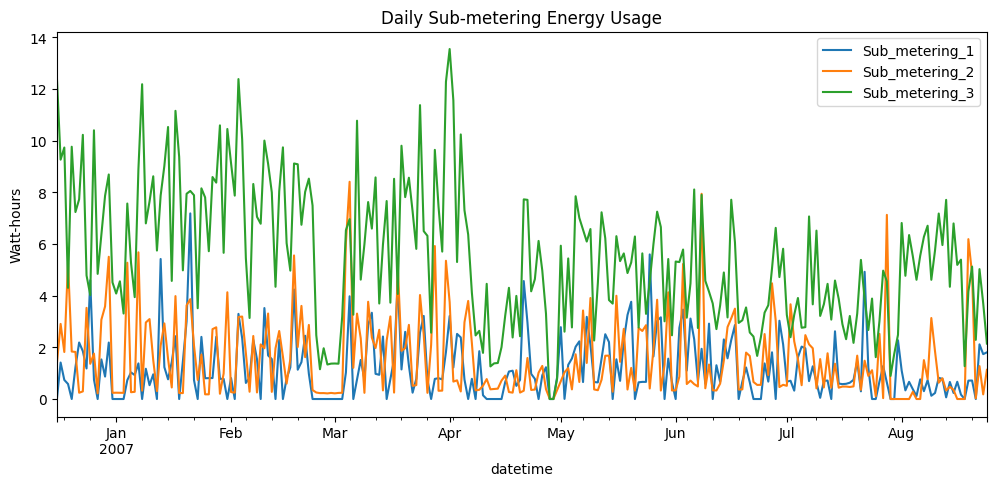

In [14]:
df_daily[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].plot(
    figsize=(12,5)
)
plt.title("Daily Sub-metering Energy Usage")
plt.ylabel("Watt-hours")
plt.show()


**Correlation Heatmap**

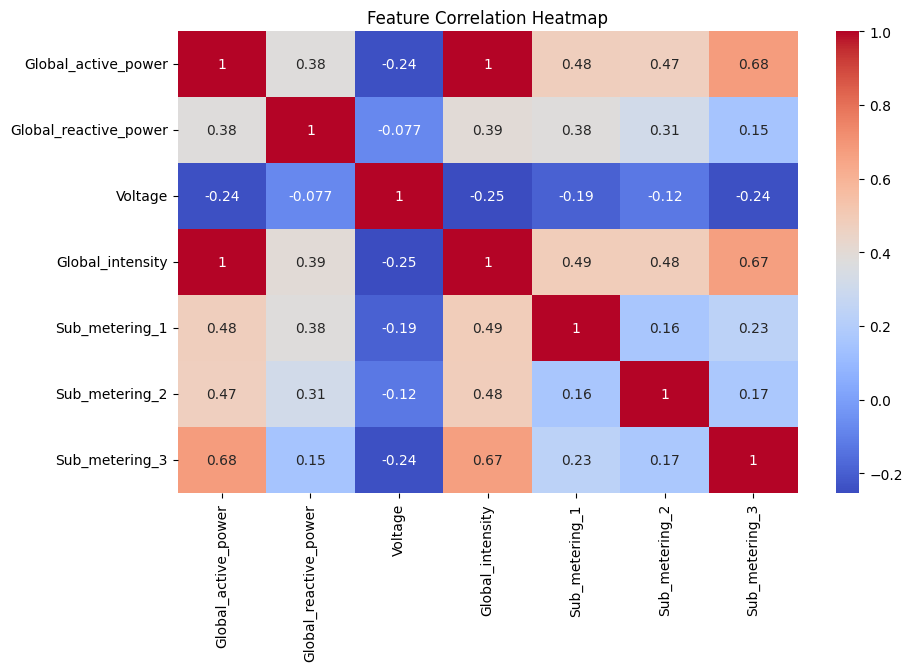

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
